# Tugas Besar 1 IF 2122 Probabilitas dan Statistika
<br>
<br><b>Kelompok : <font color=red>Gak Dicarry Bimo</font></b>
<br>Anggota :
<br><font color=green>13517004 Bimo Adityarahman W.</font>
<br><font color=blue>13517025 Ricky Yuliawan</font>

In [155]:
import math
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
from matplotlib.ticker import StrMethodFormatter

continuous_count = 50

def generate_freq(data, dist_type):
    ans = []
    
    if dist_type == 'discrete':
        min_value = data.min()
        max_value = data.max() + 1
        for i in range(min_value, max_value):
            ans.append(data[data == i].count())
    
    elif dist_type == 'continuous':
        min_value = data.min()
        max_value = data.max() 
        step = (max_value - min_value) / continuous_count
        
        i = min_value
        prev_count = 0
        while i < max_value:
            count = data[data < i].count()
            ans.append(count - prev_count)
            prev_count = count
            i += step
        count = data[data < i].count()
        ans.append(count - prev_count)
            
    return ans
    
def generate_dist(data, dist_type):
    mean = data.mean()
    variance = data.var()
    min_value = data.min()
    max_value = data.max() + 1
    data_count = data.count()
    ans = []
    
    if dist_type == 'randint':
        # mean = (low + high - 1) / 2
        # variance = (high - low + 2) ** 2 / 12 
        dist_range = math.sqrt(12 * variance + 1) - 1
        low = int(mean - dist_range / 2)
        high = int(mean + dist_range / 2 + 1)
        rv  = st.randint(low, high)
        for i in range(min_value, max_value):
            ans.append(rv.pmf(i))
        
    
    elif dist_type == 'binom':
        # mean = n * p
        # variance = n * p * (1 - p)
        p = 1. - variance / mean
        if p > 1 or p < 0:
            return ans
        n = int(mean/p)
        if n < 0:
            return ans
        rv = st.binom(n, p)
        for i in range(min_value, max_value):
            ans.append(rv.pmf(i))
    
    elif dist_type == 'nbinom':
        # mean = n * (1 - p) / p
        # variance = n * (1 - p) / (p ** 2)
        p = mean / variance
        if p > 1 or p < 0:
            return ans
        n = int(mean * p / (1 - p))
        if n < 0:
            return ans
        rv = st.nbinom(n, p)
        for i in range(min_value, max_value):
            ans.append(rv.pmf(i))
    
    elif dist_type == 'poisson':
        # mean = mu
        # variance = mu ** 2
        mu = mean
        rv = st.poisson(mu)
        for i in range(min_value, max_value):
            ans.append(rv.pmf(i))
    
    else:
        dist = getattr(st, dist_type)
        param = dist.fit(data)
        rv = dist(*param)
        max_value -= 1
        step = (max_value - min_value) / continuous_count
        
        i = min_value
        prev_count = 0
        while i < max_value:
            count = rv.cdf(i)
            ans.append(count - prev_count)
            prev_count = count
            i += step
        count = rv.cdf(i)
        ans.append(count - prev_count)
        
    for i in range(len(ans)):
        ans[i] = int(ans[i] * data_count)
        
    return ans
    
discrete_dist = ['randint', 'binom', 'nbinom', 'poisson']
continuous_dist = ['uniform', 'norm', 'gamma', 'expon', 'beta']


def fit_dist(data, dist_family):
    dist_list = []
    dist_result = []
    
    if dist_family == 'discrete':
        dist_list = discrete_dist
    
    elif dist_family == 'continuous':
        dist_list = continuous_dist
    
    best_dist = ''
    p_avrg_max = 0.
    
    for dist_type in dist_list:
        p_sum = 0.
        p_count = 0
        p_avrg = 0.
        
        for dist_type in dist_list:
            pos_dist = generate_dist(data, dist_type)
            if pos_dist != []:
                freq_dist = generate_freq(data, dist_family)
                a = []
                b = []
                for j in range(len(pos_dist)):
                    if pos_dist[j] != 0 or freq_dist[j] != 0:
                        a.append(int(pos_dist[j]))
                        b.append(int(freq_dist[j]))
                _, p_value = st.chisquare(a, b)
                p_sum += p_value
                p_count += 1
                
        if p_count > 0:
            p_avrg = p_sum/p_count
            if p_avrg > p_avrg_max:
                best_dist = dist_type
                p_avrg_max = p_avrg
        
    if best_dist != '':
        return best_dist, p_avrg_max
    else:
        return None, None

## 1. Dataset 1 (FIFA: fifa.csv)
<br>
<div style="text-align: justify"> Di sebuah <i>alternate universe</i>, setelah Tsubasa Ozora tidak berhasil membobol gawang Genzo Wakabayashi, Tsubasa memutuskan untuk menggantung sepatu miliknya dan fokus pada kejuaraan dunia FIFA 19. Agar terbentuk sebuah <i>ultimate team</i>, Tsubasa ingin menambahkan beberapa pemain baru pada tim miliknya.</div>
a. Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi umur pemain bola yang:
<br>&emsp;i. Berumur kurang dari 22 tahun
<br>&emsp;ii. Berumur lebih dari 40 tahun

In [156]:
df1 = pd.read_csv('dataset/fifa.csv')
data1 = df1['Age']

### Visualisasi Data
#### a. Histogram

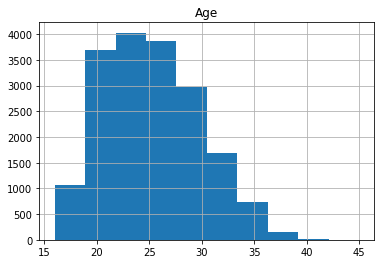

In [157]:
hist1 = df1.hist()

#### b. Box Plot

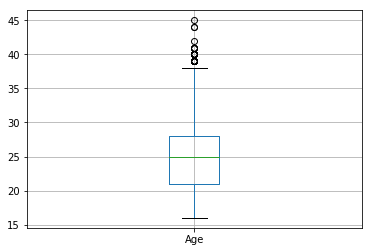

In [158]:
bp1 = df1.boxplot()

### Deskripsi Statistik

In [159]:
min1 = data1.min()
max1 = data1.max()
mean1 = data1.mean()
mode1 = data1.mode()[0]
median1 = data1.median()
var1 = data1.var()
std1 = data1.std()
skew1 = data1.skew()
kurto1 = data1.kurtosis()

print("Nilai minimum \t=",min1)
print("Nilai maksimum \t=",max1)
print("Mean \t\t=","%.2f" % mean1)
print("Modus \t\t=",mode1)
print("Median \t\t=",median1)
print("Variansi \t=","%.2f" % var1)
print("Simpangan baku \t=","%.2f" % std1)
print("Skewness \t=","%.2f" % skew1)
print("Kurtosis \t=","%.2f" % kurto1)

Nilai minimum 	= 16
Nilai maksimum 	= 45
Mean 		= 25.12
Modus 		= 21
Median 		= 25.0
Variansi 	= 21.81
Simpangan baku 	= 4.67
Skewness 	= 0.39
Kurtosis 	= -0.46


### Perkiraan Fungsi Distribusi
<br>
Melihat deskripsi statistik, karena data memiliki <i>skewness</i> ke kiri, maka data kemungkinan mengikuti distribusi negative binomial atau poisson.

### Jawaban Pertanyaan

i. Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi banyak pemain bola yang berumur kurang dari 22 tahun

In [160]:
data_count = 1000
prob = data1[data1 < 22].count()/data1.count()
expect_value = prob * data_count

print("Jadi, ekspektasi banyak pemain bola yang berumur kurang dari 22 tahun adalah","%.2f" % expect_value)

Jadi, ekspektasi banyak pemain bola yang berumur kurang dari 22 tahun adalah 260.89


ii. Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi banyak pemain bola yang berumur lebih dari 40 tahun

In [161]:
data_count = 1000
prob = data1[data1 > 40].count()/data1.count()
expect_value = prob * data_count

print("Jadi, ekspektasi banyak pemain bola yang berumur lebih dari 40 tahun adalah","%.2f" % expect_value)

Jadi, ekspektasi banyak pemain bola yang berumur lebih dari 40 tahun adalah 0.49


## 2. Dataset 3 (Black Friday : black_friday.csv)
<div style="text-align: justify"> Jika di Indonesia ada Harbolnas(Hari Belanja Online Nasional) yang puncaknya biasanya jatuh pada 12–12 alias 12 Desember, di luar negeri juga ada hari belanja di mana penjual dan toko <i>online</i> memberikan diskon besar-besaran, yaitu Black Friday. Black Friday sebenarnya merupakan hari setelah Thanksgiving di Amerika Serikat sana. Bagi kita yang ada di Indonesia, momen Black Friday ini bisa kita manfaatkan untuk belanja dari toko <i>online</i> luar negeri dengan harga miring. Sebelum mengikuti Black Friday tahun 2019 nanti (29–11–2019), mari kita bersama-sama mencari tahu beberapa hal menarik dari data hasil Black Friday tahun 2018 (data merupakan jumlah pembelian seseorang dalam dolar): </div>
a. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang: 
<br>&emsp;i. Miskin (total pembelian kurang dari 1000 dolar)
<br>&emsp;ii. Kaya (total pembelian lebih dari 10000 dolar)
<br>&emsp;iii. Crazy Rich (total pembelian lebih dari 20000 dolar)
<br>b. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli: 
<br>&emsp;i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)
<br>&emsp;ii. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif

In [162]:
df2 = pd.read_csv('dataset/black_friday.csv')
data2 = df2['8370']

### Visualisasi Data
#### a. Histogram

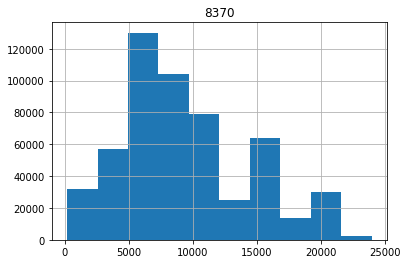

In [163]:
hist2 = df2.hist()

#### b. Box Plot

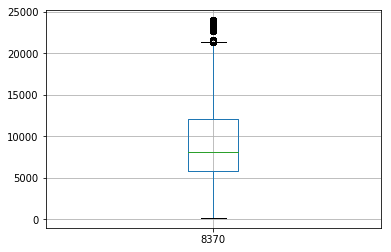

In [164]:
bp2 = df2.boxplot()

### Deskripsi Statistik

In [165]:
min2 = data2.min()
max2 = data2.max()
mean2 = data2.mean()
mode2 = data2.mode()[0]
median2 = data2.median()
var2 = data2.var()
std2 = data2.std()
skew2 = data2.skew()
kurto2 = data2.kurtosis()

print("Nilai minimum \t=",min2)
print("Nilai maksimum \t=",max2)
print("Mean \t\t=","%.2f" % mean2)
print("Modus \t\t=",mode2)
print("Median \t\t=",median2)
print("Variansi \t=","%.2f" % var2)
print("Simpangan baku \t=","%.2f" % std2)
print("Skewness \t=","%.2f" % skew2)
print("Kurtosis \t=","%.2f" % kurto2)

Nilai minimum 	= 185
Nilai maksimum 	= 23961
Mean 		= 9333.86
Modus 		= 6855
Median 		= 8062.0
Variansi 	= 24810625.91
Simpangan baku 	= 4981.03
Skewness 	= 0.62
Kurtosis 	= -0.34


### Perkiraan Fungsi Distribusi
<br>
Melihat deskripsi statistik, karena data memiliki nilai <i>skewness</i> yang kecil, maka kemungkinan data mengikuti distribusi binomial. 

### Jawaban

a. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang: 

In [166]:
buyer_counta = 250

&emsp;i. Miskin (total pembelian kurang dari 1000 dolar)

In [167]:
prob = data2[data2 < 1000].count()/data2.count()

expect_value =  buyer_counta * prob

print("Jadi, ekspektasi jumlah orang yang miskin (total pembelian kurang dari 1000 dolar) adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah orang yang miskin (total pembelian kurang dari 1000 dolar) adalah 3.28


&emsp;ii. Kaya (total pembelian lebih dari 10000 dolar)

In [168]:
prob = data2[data2 > 10000].count()/data2.count()

expect_value =  buyer_counta * prob

print("Jadi, ekspektasi jumlah orang yang kaya (total pembelian lebih dari 10000 dolar) adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah orang yang kaya (total pembelian lebih dari 10000 dolar) adalah 86.80


&emsp;iii. Crazy Rich (total pembelian lebih dari 20000 dolar)

In [169]:
prob = data2[data2 > 20000].count()/data2.count()

expect_value =  buyer_counta * prob

print("Jadi, ekspektasi jumlah orang yang crazy Rich (total pembelian lebih dari 20000 dolar) adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah orang yang crazy Rich (total pembelian lebih dari 20000 dolar) adalah 5.82


b. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli: 

In [170]:
buyer_countb = 1000

&emsp;i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [171]:
prob = (data2[data2 <= 2000].count() - data2[data2 < 1980].count()) / data2.count()

expect_value =  buyer_countb * prob

print("Jadi, ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif) adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif) adalah 1.24


&emsp;ii. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [172]:
prob = (data2[data2 <= 2897].count() - data2[data2 < 2707].count()) / data2.count()

expect_value =  buyer_countb * prob

print("Jadi, ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif) adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif) adalah 7.17


## 3. Dataset 4 (Cryptocurrency : crypto.csv)
<div style="text-align: justify">Nyonya Rin sangat suka batu permata, tetapi uang yang dia punya terlalu sedikit untuk membiayai kebutuhan berliannya. Dia mendengar bahwa bermain dengan <i>cryptocurrency</i> adalah cara yang sangat cepat untuk menjadi sangat kaya (atau sangat miskin). Anda, sebagai seorang yang haus uang, bersekongkol dengan Nyonya Rin untuk bermain <i>cryptocurrency</i>, di mana Nyonya Rin menyediakan modal. Anda seorang statistikawan dan belum pernah menyentuh pasar modal atau semacamnya, sehingga Anda mengambil data pergerakan harga <i>cryptocurrency</i>, lalu dengan lugunya membuang dimensi waktu dari data tersebut. Nyonya Rin, sama-sama buta dalam permainan pasar modal, menanyakan pertanyaan kurang relevan sebagai berikut:</div>
a. Apabila hari ini terdapat 1000 data harga <i>cryptocurrency</i> baru, tentukan ekspektasi jumlah <i>cryptocurrency</i> yang nilainya
<br>&emsp;i. kurang dari 0.177013 
<br>&emsp;ii. lebih dari 177.013 
<br>b. Jika suatu hari terdapat sebuah <i>cryptocurrency</i> baru, tentukan peluang <i>cryptocurrency</i> tersebut bernilai 
<br>&emsp;i. lebih dari 0.013 
<br>&emsp;ii. kurang dari 17.7 

In [173]:
df3 = pd.read_csv('dataset/crypto.csv')
data3 = df3['1.5e-05']

### Visualisasi Data
#### a. Histogram

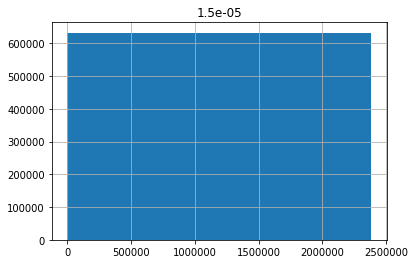

In [174]:
hist3 = df3.hist(bins = 1)

#### b. Box Plot

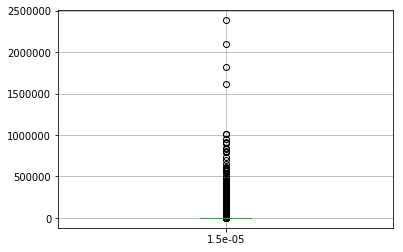

In [175]:
bp3 = df3.boxplot()

### Deskripsi Statistik

In [176]:
min3 = data3.min()
max3 = data3.max()
mean3 = data3.mean()
mode3 = data3.mode()[0]
median3 = data3.median()
var3 = data3.var()
std3 = data3.std()
skew3 = data3.skew()
kurto3 = data3.kurtosis()

print("Nilai minimum \t=","%.6f" % min3)
print("Nilai maksimum \t=","%.6f" % max3)
print("Mean \t\t=","%.6f" % mean3)
print("Modus \t\t=","%.6f" % mode3)
print("Median \t\t=","%.6f" % median3)
print("Variansi \t=","%.6f" % var3)
print("Simpangan baku \t=","%.6f" % std3)
print("Skewness \t=","%.6f" % skew3)
print("Kurtosis \t=","%.6f" % kurto3)

Nilai minimum 	= 0.000000
Nilai maksimum 	= 2383502.500000
Mean 		= 203.018467
Modus 		= 0.000002
Median 		= 0.009734
Variansi 	= 75320534.284159
Simpangan baku 	= 8678.740363
Skewness 	= 118.239514
Kurtosis 	= 22297.435591


### Perkiraan Fungsi Distribusi
<br>
Melihat deskripsi statistik, karena data memiliki <i>skewness</i> ke kiri yang besar, kemungkinan data mengikuti distribusi gamma.

### Jawaban

a. Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya

In [177]:
crypto_count = 1000

&emsp;i. kurang dari 0.177013

In [178]:
prob = data3[data3 < 0.177013].count()/ data3.count()

expect_value =  crypto_count * prob

print("Jadi, ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah cryptocurrency yang nilainya kurang dari 0.177013 adalah 780.33


&emsp;ii. lebih dari 177.013

In [179]:
prob = data3[data3 > 177.013].count()/ data3.count()

expect_value =  crypto_count * prob

print("Jadi, ekspektasi jumlah cryptocurrency yang nilainya lebih dari 0.013 adalah","%.2f" % expect_value)

Jadi, ekspektasi jumlah cryptocurrency yang nilainya lebih dari 0.013 adalah 10.80


b. Jika suatu hari terdapat sebuah <i>cryptocurrency</i> baru, tentukan peluang <i>cryptocurrency</i> tersebut bernilai 

&emsp;i. lebih dari 0.013 

In [180]:
probb1 = data3[data3 > 0.013].count() / data3.count()

print("Jadi, peluang cryptocurrency tersebut bernilai lebih dari 0.013 adalah","%.2f" % probb1)

Jadi, peluang cryptocurrency tersebut bernilai lebih dari 0.013 adalah 0.47


&emsp;ii. kurang dari 17.7 

In [181]:
probb2 = data3[data3 < 17.7].count() / data3.count()

print("Jadi, peluang cryptocurrency tersebut bernilai lebih dari 0.013 adalah","%.2f" % probb2)

Jadi, peluang cryptocurrency tersebut bernilai lebih dari 0.013 adalah 0.97


## 4. Dataset 5 (Atlet Olimpiade: athletes.csv) 
<div style="text-align: justify">Tuan X adalah seorang mantan atlet tua dan miskin yang melewati kesempatannya meraih kejayaan dalam Olimpiade. Dia memiliki seorang anak, Y, yang dia hendak didik dari bayi untuk menjadi atlet Olimpiade kelas dunia, apapun caranya. Dia telah meminta Anda, seorang statistikawan,untuk menganalisis peluang bocah ingusan tersebut mendapat setidaknya satu medali apapun (emas, perak, perunggu, yang penting dijual dapat uang banyak). Anda memiliki data nama-nama semua atlet yang pernah mengikuti Olimpiade, dari tahun 1800-an hingga 2018, serta jumlah medali apapun yang pernah ia raih seumur hidupnya. Demi kesohoran anak malang tersebut, Anda harus menentukan jawaban persoalan berikut: </div>
a. Peluang Y meraih 
<br>&emsp;i. tepat 0 medali 
<br>&emsp;ii. lebih dari 10 medali 
<br>&emsp;iii. tepat 3 medali 
<br>&emsp;iv. 1 atau 5 medali 
<br>b. <i>Confidence interval</i> 95% 

In [182]:
df4 = pd.read_csv('dataset/athletes.csv')
data4 = df4['Medal']

### Visualisasi Data
#### a. Histogram

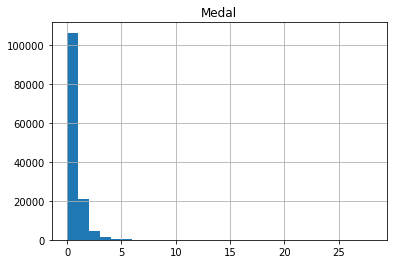

In [183]:
hist4 = df4.hist(bins = 28)

#### b. Box Plot

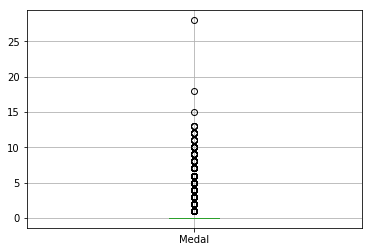

In [184]:
bp4 = df4.boxplot()

### Statistical Description

In [185]:
min4 = data4.min()
max4 = data4.max()
mean4 = data4.mean()
mode4 = data4.mode()[0]
median4 = data4.median()
var4 = data4.var()
std4 = data4.std()
skew4 = data4.skew()
kurto4 = data4.kurtosis()

print("Nilai minimum \t=",min4)
print("Nilai maksimum \t=",max4)
print("Mean \t\t=","%.2f" % mean4)
print("Modus \t\t=",mode4)
print("Median \t\t=",median4)
print("Variansi \t=","%.2f" % var4)
print("Simpangan baku \t=","%.2f" % std4)
print("Skewness \t=","%.2f" % skew4)
print("Kurtosis \t=","%.2f" % kurto4)

Nilai minimum 	= 0
Nilai maksimum 	= 28
Mean 		= 0.30
Modus 		= 0
Median 		= 0.0
Variansi 	= 0.53
Simpangan baku 	= 0.72
Skewness 	= 4.82
Kurtosis 	= 51.56


### Perkiraan Fungsi Distribusi
<br>
Melihat deskripsi statistik, karena data memiliki <i>skewness</i> ke kiri, maka data kemungkinan memiliki distribusi negative binomial atau poisson. Jika dimodelkan dengan distribusi kontinu, maka data kemungkinan memiliki distribusi gamma.

### Jawaban

a. Peluang Y meraih 

&emsp;i. tepat 0 medali 

In [186]:
proba1 = data4[data4 == 0].count() / data4.count()

print("Jadi, peluang Y meraih tepat 0 medali adalah","%.10f" % proba1)

Jadi, peluang Y meraih tepat 0 medali adalah 0.7906792052


&emsp;ii. lebih dari 10 medali 

In [187]:
proba2 = data4[data4 > 10].count() / data4.count()

print("Jadi, peluang Y meraih lebih dari 10 medali adalah","%.10f" % proba2)

Jadi, peluang Y meraih lebih dari 10 medali adalah 0.0001558661


&emsp;iii. tepat 3 medali 

In [188]:
proba3 = data4[data4 == 3].count() / data4.count()

print("Jadi, peluang Y meraih tepat 3 medali adalah","%.10f" % proba3)

Jadi, peluang Y meraih tepat 3 medali adalah 0.0102797426


&emsp;iv. 1 atau 5 medali 

In [189]:
proba4 = (data4[data4 == 1].count() + data4[data4 == 5].count()) / data4.count()

print("Jadi, peluang Y meraih tepat 1 atau 5 medali adalah","%.10f" % proba4)

Jadi, peluang Y meraih tepat 1 atau 5 medali adalah 0.1588424342


b. <i>Confidence interval</i> 95% 

In [190]:
confidence = 0.95

low = mean4 - std4 * st.t.ppf((1 + confidence) / 2, df4.count() - 1)
high = mean4 + std4 * st.t.ppf((1 + confidence) / 2, df4.count() - 1)
print("Jadi, confidence interval 95%-nya adalah","%.6f" % low[0],"< μ <","%.6f" % high[0])

Jadi, confidence interval 95%-nya adalah -1.125153 < μ < 1.715707
